### By - Aastha Agarwal 
### LinkedIn - https://www.linkedin.com/in/aasthaa1jan/
_________________________________________________________________________________________________
# Part 4 --> **SQL GROUPING & SORTING**

________________________________________________________________________________

For this Module, we'll be Working with a sample industrial dataset.
* Name : Smartphone
* Format : .csv

We'll be using **Apache XAMPP** for this module.

__________________________________________________________________________________

We Have a few set of questions for Understanding the concept of 
1. `Sorting`
2. `Grouping`
3. `Using Having Clause`

_______________________________________________________________________________


## STEP 1 - IMPORTING DATA INTO XAMPP

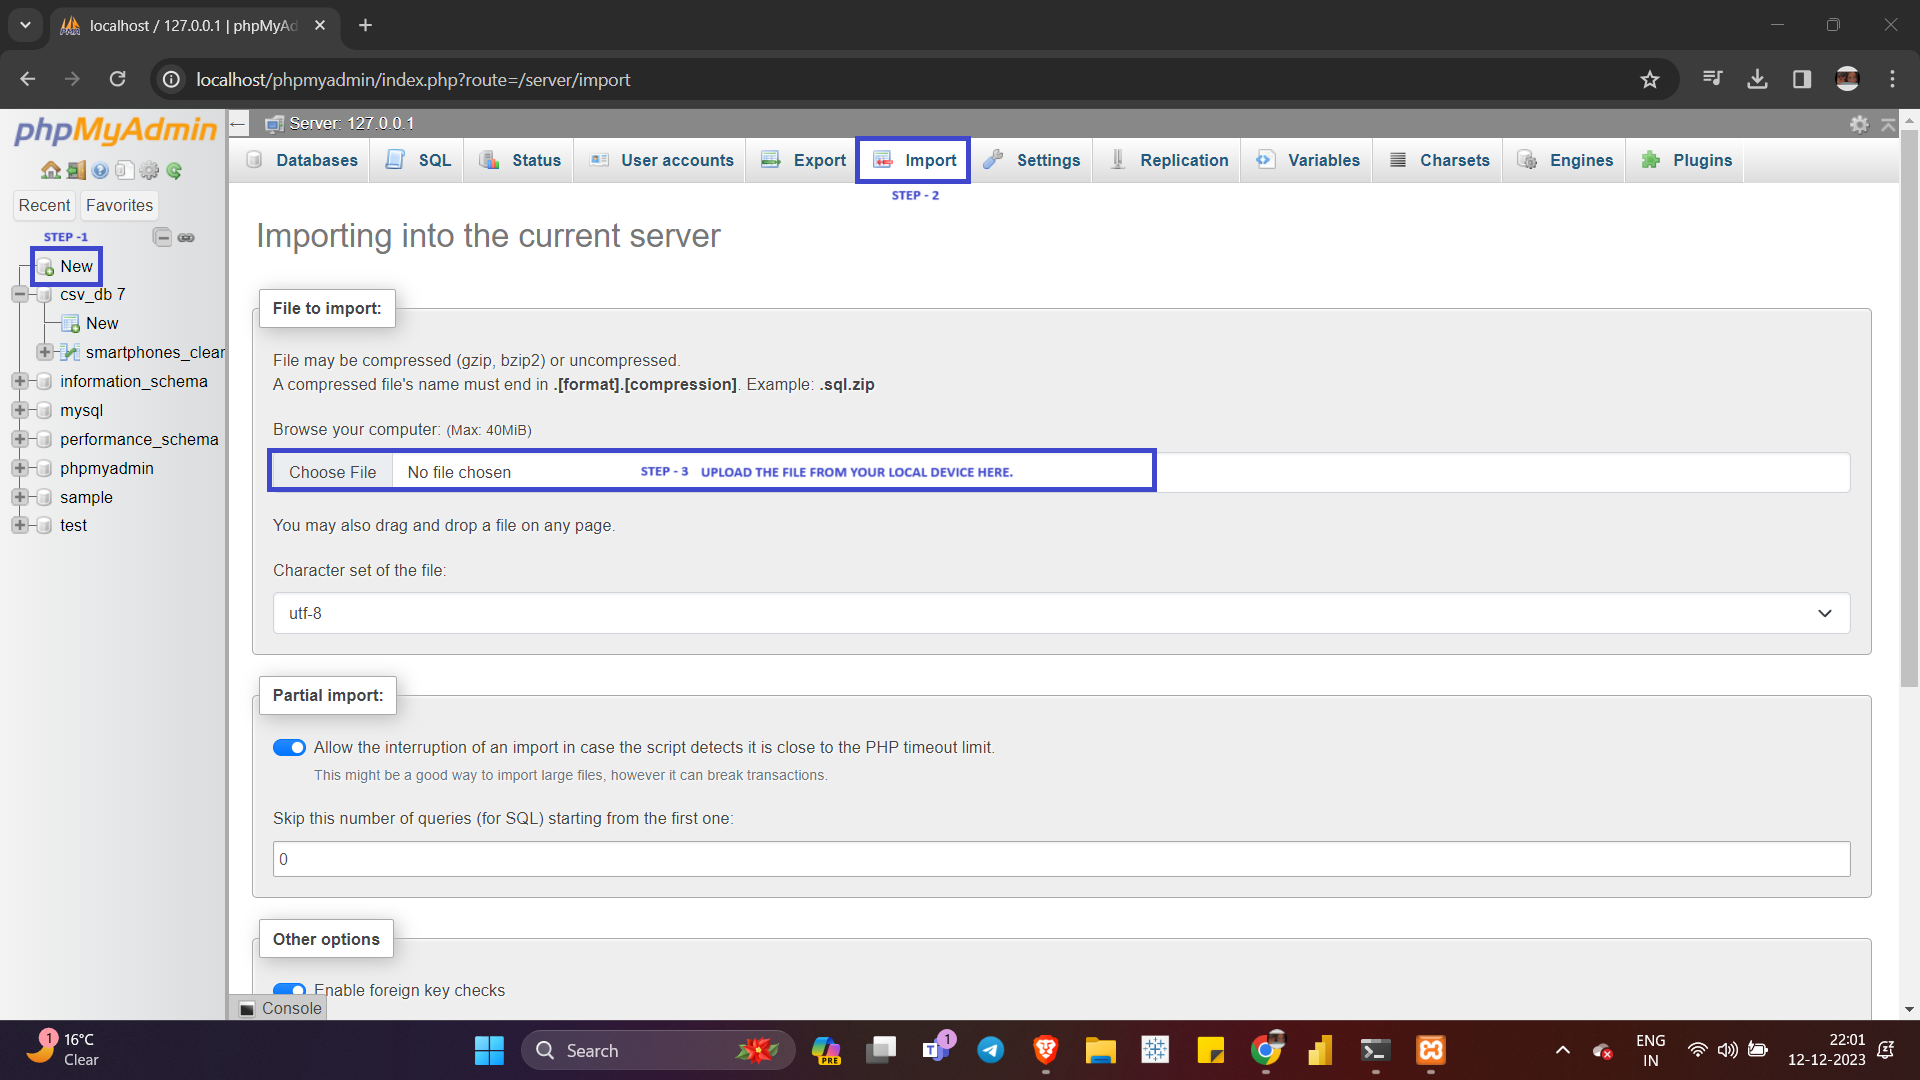

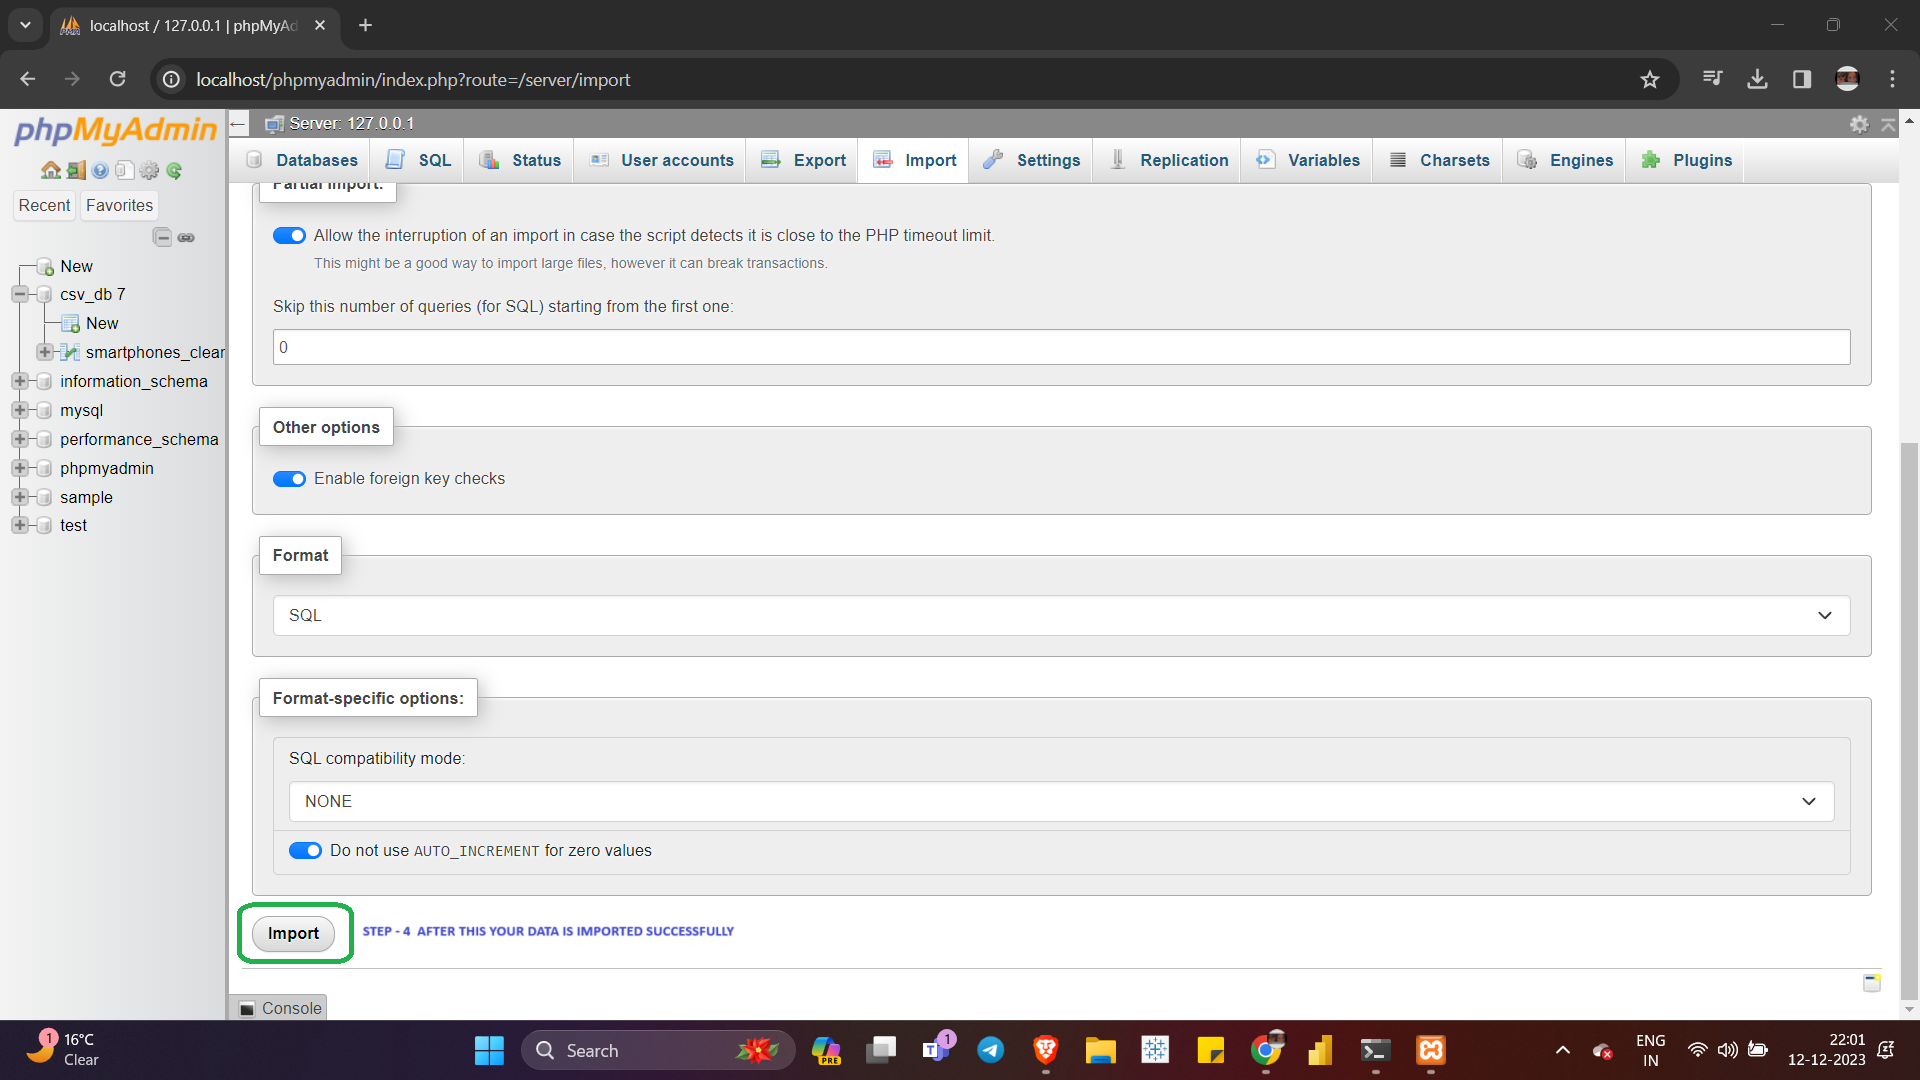

Ensure that you select the option "The first line of the file contains the table column names"

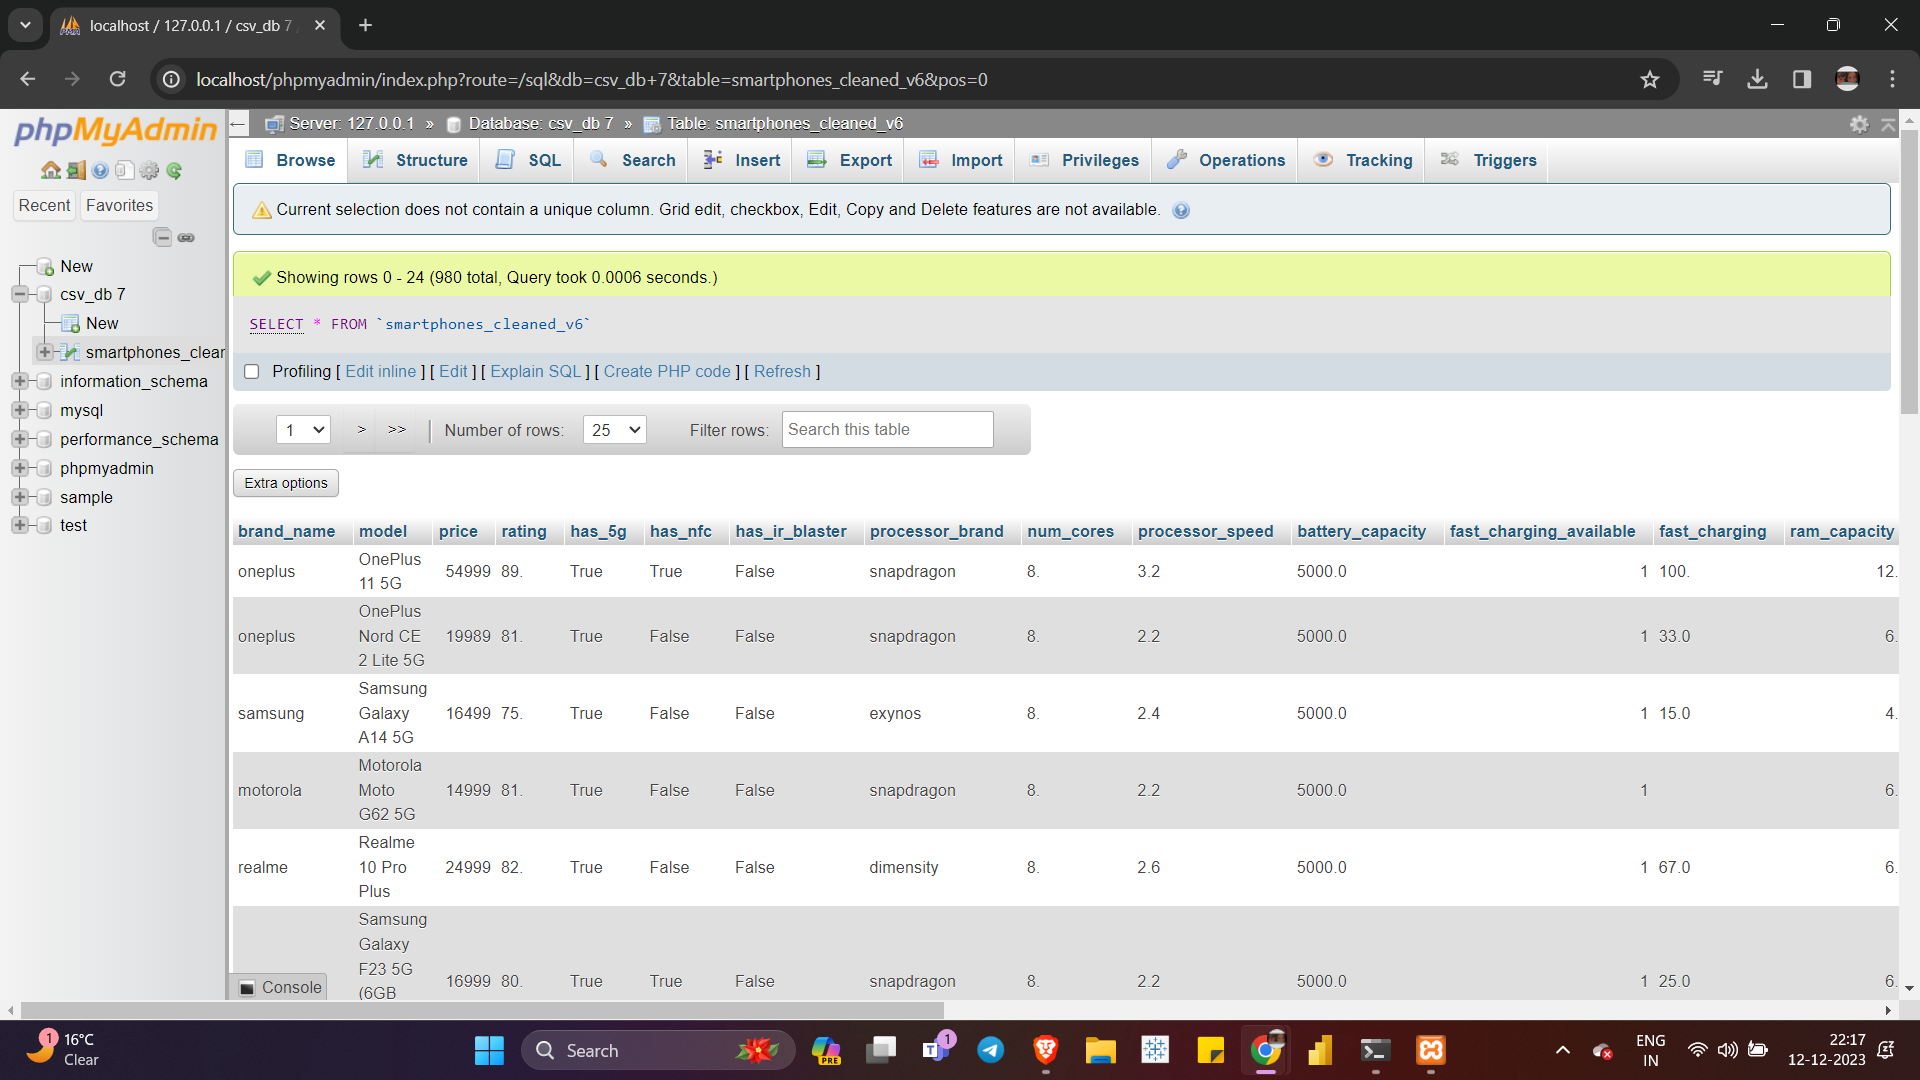
___________________________________________________________________________________________

# **SORTING DATA**
_________________________________________________________________________________

### 1. Find top 5 Samsung phones with biggest screen size 
```sql
SELECT * FROM `smartphones_cleaned_v6` 
WHERE brand_name = 'samsung'
ORDER BY screen_size DESC
LIMIT 5;
```

_________________________________________________________________________

### 2. Sort All Phones by Descending Order of Total Cameras 
```sql
SELECT model,(num_rear_cameras + num_front_cameras) AS 'total_cameras' FROM `smartphones_cleaned_v6`
ORDER BY total_cameras DESC ; 
```

__________________________________________________________________________

### 3. Sort Data Based on PPI in Decreasing Order.
```sql
SELECT model, ROUND(SQRT(resolution_width*resolution_width + resolution_height*resolution_height) / screen_size) AS ppi
FROM `smartphones_cleaned_v6` 
ORDER BY ppi DESC;
```

_________________________________________________________________

### 4. Find Phone with the Second Largest Battery.
```sql
SELECT model 
FROM `smartphones_cleaned_v6`
ORDER BY battery_capacity DESC
LIMIT 1 OFFSET 1 ; 

```

OR

```sql
SELECT model 
FROM `smartphones_cleaned_v6`
ORDER BY battery_capacity DESC
LIMIT 1 , 1 ; 

```
`LIMIT 1 , 1 ;` --> Skip 1 row and then print the very next row

#### OUTPUT

|model|
|-----|
|Oukitel WP9|

______________________________________________________________________________________


### 5. Find Number and Rating of the Worst-Rated Apple Phone.
```sql
SELECT model, rating 
FROM `smartphones_cleaned_v6`
WHERE brand_name = 'apple'
ORDER BY rating ASC LIMIT 1; 
```

#### OUTPUT

|model                 |rating|
|----------------------|------|
|Apple iPhone SE 3 2022| 0    | 

_____________________________________________________________________________________________

### 6. Sort Phones Alphabetically and Then by Rating in Descending Order.
```sql
SELECT * FROM `smartphones_cleaned_v6`
ORDER BY brand_name ASC, rating DESC;
```

______________________________________________________________________________________

### 7. Sort Phones Alphabetically and Then by Rating in Descending Order.
```sql
SELECT * FROM `smartphones_cleaned_v6`
ORDER BY brand_name ASC, price DESC;
```
________________________________________________________________________________________________________

# **GROUPING DATA**

____________________________________________________________________________________

### 1. Group by Brand and Get Count, Average Price, Max Rating, Average Screen Size, and Average Battery Capacity.
```sql
SELECT brand_name , COUNT(*) AS 'num_phones', ROUND(AVG(price)) AS 'avg_price' , MAX(rating) AS 'max_rating', ROUND(AVG(screen_size),2) AS 'avg_screensize', ROUND(AVG(battery_capacity),2) AS 'avg_battery_capacity'
FROM `smartphones_cleaned_v6`
GROUP BY brand_name
ORDER BY num_phones DESC LIMIT 15
```

_______________________________________________________________________________________

### 2. Group Smartphones by NFC Presence and Get Average Price and Rating.
```sql
SELECT has_nfc , ROUND(AVG(price)) AS 'avg_price' , ROUND(AVG(rating)) AS 'avg_rating'
FROM `smartphones_cleaned_v6`
GROUP BY has_nfc
```
#### OUTPUT - 

| has_nfc	| avg_price	 | avg_rating	|
|-----------|------------|--------------| 
| False     | 17295      | 70           | 
| True      | 55262      | 71           | 

____________________________________________________________________________________________

### 3. Group Smartphones by Extended Memory and Get Average Price.
```sql
SELECT extended_memory_available, AVG(price) AS 'avg_price'
FROM `smartphones_cleaned_v6`
GROUP BY extended_memory_available
```
#### OUTPUT 

|extended_memory_available | avg_price  | 
|--------------------------|------------|
| 0                        | 55681.1989 |
| 1                        | 18953.8835 | 

______________________________________________________________________________

### 4a. Group Smartphones by Brand and Processor Brand
```sql
SELECT brand_name, processor_brand 
FROM `smartphones_cleaned_v6` 
GROUP BY brand_name, processor_brand;
```

_____________________________________________________________________________

### 4b. Group Smartphones by Brand and Processor Brand and get the count of the model and the average primary camera resolution(rear)
```sql
SELECT brand_name, processor_brand , COUNT(*) AS 'model count', AVG(primary_camera_rear) AS 'avg_primary_camera_resolution_rear'
FROM `smartphones_cleaned_v6` 
GROUP BY brand_name, processor_brand;
```
_________________________________________________________________________________________

### 5. Top Five Most Costly Brands
```sql
SELECT brand_name, AVG(price) AS 'avg_price'
FROM `smartphones_cleaned_v6` 
GROUP BY brand_name
ORDER BY avg_price DESC 
LIMIT 5
```

#### OUTPUT


| brand_name	| avg_price    |
|---------------|--------------|
| vertu         | 650000.0000  |
| royole        | 129999.0000  | 
| leitz         | 124990.0000  |
| apple         | 95966.5217   |
| huawei        | 80177.2500   |

__________________________________________________________________________________________

### 6. Which Brand Makes the Smallest Screen Smartphone
```sql
SELECT brand_name , MIN(screen_size) AS 'smallest_screen_size' 
FROM `smartphones_cleaned_v6` 
GROUP BY brand_name
ORDER BY smallest_screen_size ASC
LIMIT 1
```
#### OUTPUT 

| brand_name | smallest_screen_size | 
|------------|----------------------|
| duoqin     | 3.54                 |

__________________________________________________________________________________________

### 7. Average Price of 5G Phones vs Average Price of non 5G Phones
```sql
SELECT has_5g, AVG(price) as 'avg_price'
FROM `smartphones_cleaned_v6` 
GROUP BY has_5g
```

#### OUTPUT

| has_5g | avg_price	|
|--------|--------------|
| False  | 18916.5336   |
| True   | 43200.4882   |

____________________________________________________________________________________________

### 8. Group Smartphones by Brand and Find the Brand with the Highest Number of Models with Both NFC and 5G:
```sql
SELECT brand_name, model, COUNT(*) AS 'number_of_models'
FROM `smartphones_cleaned_v6` 
WHERE has_nfc = 'True' AND has_5g = 'True'
GROUP BY brand_name
ORDER BY number_of_models DESC
```
_____________________________________________________________________________________________________

### 9. Find All Samsung 5G Enabled Smartphones and Find Out the Average Price for NFC and Non-NFC Phones:
```sql
SELECT has_nfc,  AVG(price) AS 'avg_price'
FROM `smartphones_cleaned_v6` 
WHERE brand_name = 'samsung' AND has_5g = 'True'
GROUP BY has_nfc 
```
#### OUTPUT

| has_nfc	 | avg_price  |
|------------|------------|
| False      | 28820.8824 |
| True       | 60458.8269 |


___________________________________________________________________________________

### 10. Phone Name and Price of the Costliest Phone:
```sql
SELECT model, price
FROM `smartphones_cleaned_v6`
ORDER BY price DESC
LIMIT 1;
```

#### OUTPUT

| model                  | price  |
|------------------------|--------|
| Vertu Signature Touch  | 650000 |

_________________________________________________________________________________________________

# **HAVING CLAUSE**

_________________________________________________________________________________

### 1. Find the Average Rating of Smartphone Brands with More Than 20 Phones
```sql
SELECT brand_name, AVG(rating) AS 'avg_rating', COUNT(*) AS 'total_phones'
FROM `smartphones_cleaned_v6` 
GROUP BY brand_name
HAVING total_phones > 20 
```
_____________________________________________________________________________

### 2.  Find the Top Three Brands with the Highest Average RAM that have a Refresh Rate of at Least 90 Hertz and Fast Charging Available (Don't Consider Brands with Less Than 10 Phones).

```sql
SELECT brand_name, AVG(ram_capacity) AS 'avg_RAM'  
FROM `smartphones_cleaned_v6` 
WHERE refresh_rate >= 90 AND fast_charging_available = 1 
GROUP BY brand_name
HAVING  COUNT(*) > 10
ORDER BY avg_RAM DESC
LIMIT 3
```

#### OUTPUT 

| brand_name	| avg_RAM  |
|---------------|----------|
| oppo          | 8.80769  |
| vivo          | 8.71698  |
| oneplus       | 8.52632  |

____________________________________________________________________________________

### 3. Find the Average Price of All the Smartphones with an Average Rating Greater Than 70 and Number of Phones More Than Ten Among All 5G Enabled Phones
```sql 
SELECT brand_name, model, AVG(price) AS 'avg_price'
FROM `smartphones_cleaned_v6`
WHERE has_5g = 'True'
GROUP BY brand_name
HAVING AVG(rating) > 70 AND COUNT(*) > 10
```

_________________________________________________________________________________________

#### **`Part 5 will be about SQL Joins`**